In [1]:
# 1-  Create a query or queries to extract the information you think may be relevant for building the prediction model. 
#It should include some film features and some rental features. and

#4 Create a query to get the list of films and a boolean indicating if it was rented last month. 
#This would be our target variable. put in the first query

#2 Read the data into a Pandas dataframe.

In [2]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass #to get the password without showing the input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import numpy as np
from sklearn.preprocessing import Normalizer

password = getpass.getpass()

········


In [3]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''
select f.title, f.film_id, f.release_year, f.rental_duration, f.rental_rate, f.length, f.rating, f.special_features, r.rental_date,
case when month(r.rental_date) = 2 AND YEAR(r.rental_date) = 2006 
            THEN 'True' 
            ELSE 'False' 
       END AS rented_feb_2006  
from sakila.inventory i
join film f on i.film_id = f.film_id
join rental r on i.inventory_id = r.inventory_id
;
'''

data = pd.read_sql_query(query, engine)
data.head()

,title,film_id,release_year,rental_duration,rental_rate,length,rating,special_features,rental_date,rented_feb_2006
0,ACADEMY DINOSAUR,1,2006,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",2005-07-08 19:03:15,False
1,ACADEMY DINOSAUR,1,2006,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",2005-08-02 20:13:10,False
2,ACADEMY DINOSAUR,1,2006,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",2005-08-21 21:27:43,False
3,ACADEMY DINOSAUR,1,2006,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",2005-05-30 20:21:07,False
4,ACADEMY DINOSAUR,1,2006,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",2005-06-17 20:24:00,False


In [4]:
#3 Analyze extracted features and transform them. You may need to encode some categorical variables, 
#or scale numerical variables.

In [5]:
data.shape

(16044, 10)

In [6]:
data.dtypes

title                       object
film_id                      int64
release_year                 int64
rental_duration              int64
rental_rate                float64
length                       int64
rating                      object
special_features            object
rental_date         datetime64[ns]
rented_feb_2006             object
dtype: object

In [7]:
data.isna().sum()

title               0
film_id             0
release_year        0
rental_duration     0
rental_rate         0
length              0
rating              0
special_features    0
rental_date         0
rented_feb_2006     0
dtype: int64

In [8]:
import datetime as dt

data['rental_date'] = pd.to_datetime(data['rental_date'])
data['rental_date'] = data['rental_date'].map(dt.datetime.toordinal)

In [9]:
data.head()

,title,film_id,release_year,rental_duration,rental_rate,length,rating,special_features,rental_date,rented_feb_2006
0,ACADEMY DINOSAUR,1,2006,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",732135,False
1,ACADEMY DINOSAUR,1,2006,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",732160,False
2,ACADEMY DINOSAUR,1,2006,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",732179,False
3,ACADEMY DINOSAUR,1,2006,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",732096,False
4,ACADEMY DINOSAUR,1,2006,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",732114,False


In [10]:
data['film_id'] = data['film_id'].astype('object')
data = data.drop(['release_year'],axis=1)

In [11]:
data["rented_feb_2006"] = data["rented_feb_2006"].replace({"True": True, "False": False}).astype(bool)

In [12]:
data.head()

,title,film_id,rental_duration,rental_rate,length,rating,special_features,rental_date,rented_feb_2006
0,ACADEMY DINOSAUR,1,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",732135,False
1,ACADEMY DINOSAUR,1,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",732160,False
2,ACADEMY DINOSAUR,1,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",732179,False
3,ACADEMY DINOSAUR,1,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",732096,False
4,ACADEMY DINOSAUR,1,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",732114,False


In [13]:
data.isna().sum().sum()

0

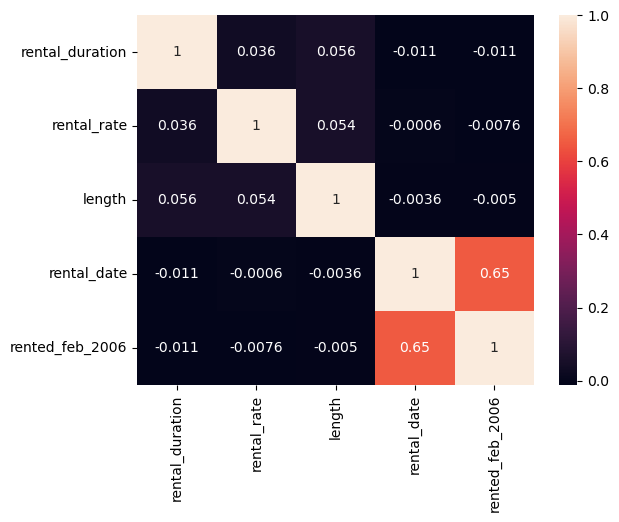

In [14]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)   
plt.show()

In [15]:
X = data.select_dtypes (include = np.number) 
X.head()

,rental_duration,rental_rate,length,rental_date
0,6,0.99,86,732135
1,6,0.99,86,732160
2,6,0.99,86,732179
3,6,0.99,86,732096
4,6,0.99,86,732114


In [16]:
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)
x = pd.DataFrame(x_normalized)
x.columns = X.columns
x.head()

,rental_duration,rental_rate,length,rental_date
0,0.000008,0.000001,0.000117,1.0
1,0.000008,0.000001,0.000117,1.0
2,0.000008,0.000001,0.000117,1.0
3,0.000008,0.000001,0.000117,1.0
4,0.000008,0.000001,0.000117,1.0


In [17]:
cat = data.select_dtypes(include = object)
cat

,title,film_id,rating,special_features
0,ACADEMY DINOSAUR,1,PG,"Deleted Scenes,Behind the Scenes"
1,ACADEMY DINOSAUR,1,PG,"Deleted Scenes,Behind the Scenes"
2,ACADEMY DINOSAUR,1,PG,"Deleted Scenes,Behind the Scenes"
3,ACADEMY DINOSAUR,1,PG,"Deleted Scenes,Behind the Scenes"
4,ACADEMY DINOSAUR,1,PG,"Deleted Scenes,Behind the Scenes"
...,...,...,...,...
16039,ZORRO ARK,1000,NC-17,"Trailers,Commentaries,Behind the Scenes"
16040,ZORRO ARK,1000,NC-17,"Trailers,Commentaries,Behind the Scenes"
16041,ZORRO ARK,1000,NC-17,"Trailers,Commentaries,Behind the Scenes"
16042,ZORRO ARK,1000,NC-17,"Trailers,Commentaries,Behind the Scenes"


In [18]:
categorical = pd.get_dummies(cat,columns=['title', 'film_id','rating','special_features'])
categorical

C:\Users\ines_\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,title_ACADEMY DINOSAUR,title_ACE GOLDFINGER,title_ADAPTATION HOLES,title_AFFAIR PREJUDICE,title_AFRICAN EGG,title_AGENT TRUMAN,title_AIRPLANE SIERRA,title_AIRPORT POLLOCK,title_ALABAMA DEVIL,title_ALADDIN CALENDAR,...,special_features_Deleted Scenes,"special_features_Deleted Scenes,Behind the Scenes",special_features_Trailers,"special_features_Trailers,Behind the Scenes","special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes"
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
X = np.concatenate((x,categorical),axis=1)
y = data['rented_feb_2006']

In [20]:
#5 Create a logistic regression model to predict this variable from the cleaned data.

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4)

In [22]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression().fit(X_train,y_train)

In [23]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

C:\Users\ines_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [24]:
predictions = classification.predict(X_test)
predictions

array([False, False, False, ..., False, False, False])

In [25]:
classification.score(X_test,y_test)

0.9912745403552509

In [26]:
y_test.value_counts()

False    6362
True       56
Name: rented_feb_2006, dtype: int64

In [27]:
pd.Series(predictions).value_counts()

False    6418
dtype: int64

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[6362,    0],
       [  56,    0]], dtype=int64)

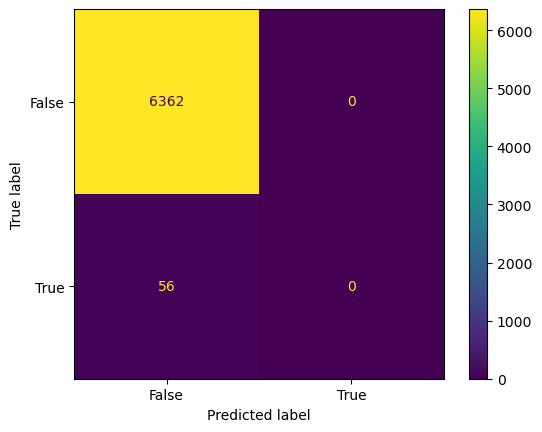

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=classification.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classification.classes_)
disp.plot()

plt.show()

In [30]:
# 6 - Evaluate the results.

data

,title,film_id,rental_duration,rental_rate,length,rating,special_features,rental_date,rented_feb_2006
0,ACADEMY DINOSAUR,1,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",732135,False
1,ACADEMY DINOSAUR,1,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",732160,False
2,ACADEMY DINOSAUR,1,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",732179,False
3,ACADEMY DINOSAUR,1,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",732096,False
4,ACADEMY DINOSAUR,1,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",732114,False
...,...,...,...,...,...,...,...,...,...
16039,ZORRO ARK,1000,3,4.99,50,NC-17,"Trailers,Commentaries,Behind the Scenes",732095,False
16040,ZORRO ARK,1000,3,4.99,50,NC-17,"Trailers,Commentaries,Behind the Scenes",732112,False
16041,ZORRO ARK,1000,3,4.99,50,NC-17,"Trailers,Commentaries,Behind the Scenes",732139,False
16042,ZORRO ARK,1000,3,4.99,50,NC-17,"Trailers,Commentaries,Behind the Scenes",732158,False


In [34]:
data["rented_next_month"]= model.predict(X)
data

,title,film_id,rental_duration,rental_rate,length,rating,special_features,rental_date,rented_feb_2006,rented_nextmonth,rented_next_month
0,ACADEMY DINOSAUR,1,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",732135,False,False,False
1,ACADEMY DINOSAUR,1,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",732160,False,False,False
2,ACADEMY DINOSAUR,1,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",732179,False,False,False
3,ACADEMY DINOSAUR,1,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",732096,False,False,False
4,ACADEMY DINOSAUR,1,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",732114,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16039,ZORRO ARK,1000,3,4.99,50,NC-17,"Trailers,Commentaries,Behind the Scenes",732095,False,False,False
16040,ZORRO ARK,1000,3,4.99,50,NC-17,"Trailers,Commentaries,Behind the Scenes",732112,False,False,False
16041,ZORRO ARK,1000,3,4.99,50,NC-17,"Trailers,Commentaries,Behind the Scenes",732139,False,False,False
16042,ZORRO ARK,1000,3,4.99,50,NC-17,"Trailers,Commentaries,Behind the Scenes",732158,False,False,False


In [37]:
data_rented_nextmonth = data[data['rented_next_month'] == True]
data_rented_nextmonth = data_rented_nextmonth[["title", "rented_feb_2006", "rented_next_month"]]
data_rented_nextmonth

,title,rented_feb_2006,rented_next_month
42,AFFAIR PREJUDICE,False,True
43,AFFAIR PREJUDICE,False,True
44,AFFAIR PREJUDICE,False,True
45,AFFAIR PREJUDICE,False,True
46,AFFAIR PREJUDICE,False,True
...,...,...,...
15991,ZHIVAGO CORE,False,True
15992,ZHIVAGO CORE,False,True
15993,ZHIVAGO CORE,False,True
15994,ZHIVAGO CORE,False,True


In [38]:
unique_titles = data_rented_nextmonth['title'].unique()
print(unique_titles)

['AFFAIR PREJUDICE' 'ALI FOREVER' 'ALONE TRIP' 'AMADEUS HOLY'
 'AMISTAD MIDSUMMER' 'ARMAGEDDON LOST' 'BANG KWAI' 'BASIC EASY'
 'BLADE POLISH' 'BLANKET BEVERLY' 'BOULEVARD MOB' 'BOUND CHEAPER'
 'BUBBLE GROSSE' 'BULL SHAWSHANK' 'CAMELOT VACATION' 'CANDIDATE PERDITION'
 'CAT CONEHEADS' 'CHAMBER ITALIAN' 'CHASING FIGHT' 'CHITTY LOCK'
 'CINCINATTI WHISPERER' 'CONNECTION MICROCOSMOS' 'CONVERSATION DOWNHILL'
 'CREATURES SHAKESPEARE' 'CROOKED FROGMEN' 'CURTAIN VIDEOTAPE'
 'DANCES NONE' 'DAY UNFAITHFUL' 'DEEP CRUSADE' 'DETAILS PACKER'
 'DETECTIVE VISION' 'DOORS PRESIDENT' 'DRAGONFLY STRANGERS' 'DRIVER ANNIE'
 'EAGLES PANKY' 'EARTH VISION' 'EFFECT GLADIATOR' 'ENCINO ELF'
 'ENOUGH RAGING' 'FALCON VOLUME' 'FAMILY SWEET' 'FIGHT JAWBREAKER'
 'FLYING HOOK' 'FORRESTER COMANCHEROS' 'FRIDA SLIPPER' 'FRISCO FORREST'
 'GABLES METROPOLIS' 'GHOST GROUNDHOG' 'GLEAMING JAWBREAKER'
 'GORGEOUS BINGO' 'GRAIL FRANKENSTEIN' 'GROUNDHOG UNCUT' 'GUNFIGHT MOON'
 'HALF OUTFIELD' 'HARRY IDAHO' 'HOLES BRANNIGAN' 'HYDE DO